In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download shrutibhargava94/india-air-quality-data

  0% 0.00/5.22M [00:00<?, ?B/s]
100% 5.22M/5.22M [00:00<00:00, 91.9MB/s]


In [ ]:
! unzip \*.zip && rm *.zip

Archive:  india-air-quality-data.zip
  inflating: data.csv                


#AIR QUALITY PREDICTION

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# import data
df = pd.read_csv('data.csv',encoding='cp1252')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Understanding

In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(435742, 13)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
#to check missiing values in dataset
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
#statistical overview of the dataset
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [ ]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [ ]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

Data Visualization

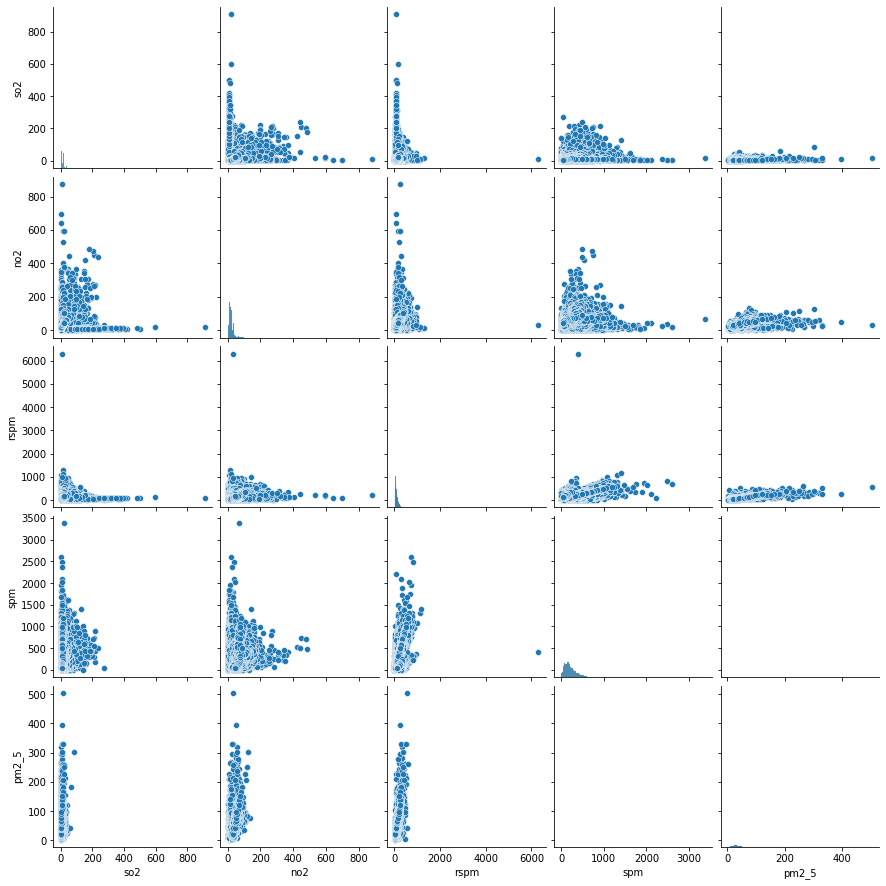

In [ ]:

sns.pairplot(data=df)

In [ ]:
#viewing the count of the values present in the state column
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

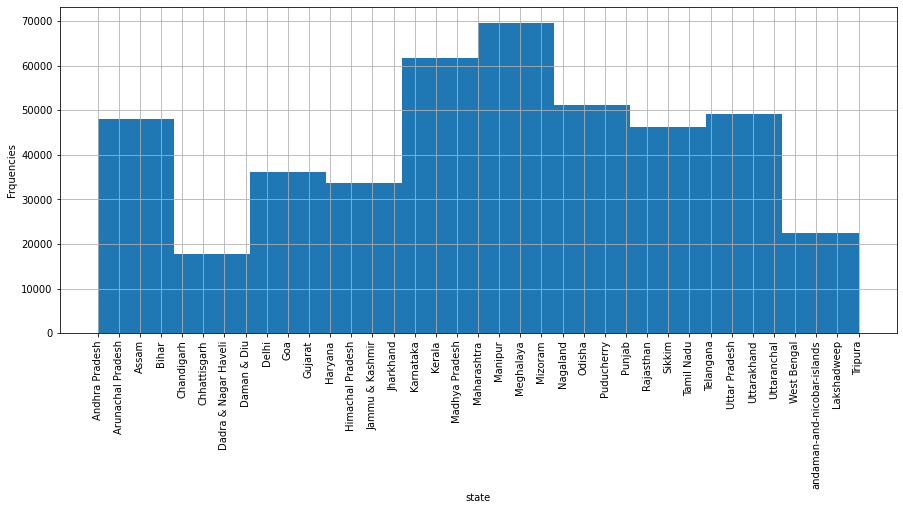

In [ ]:
#the count of states present in dataset
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frquencies')
plt.plot()

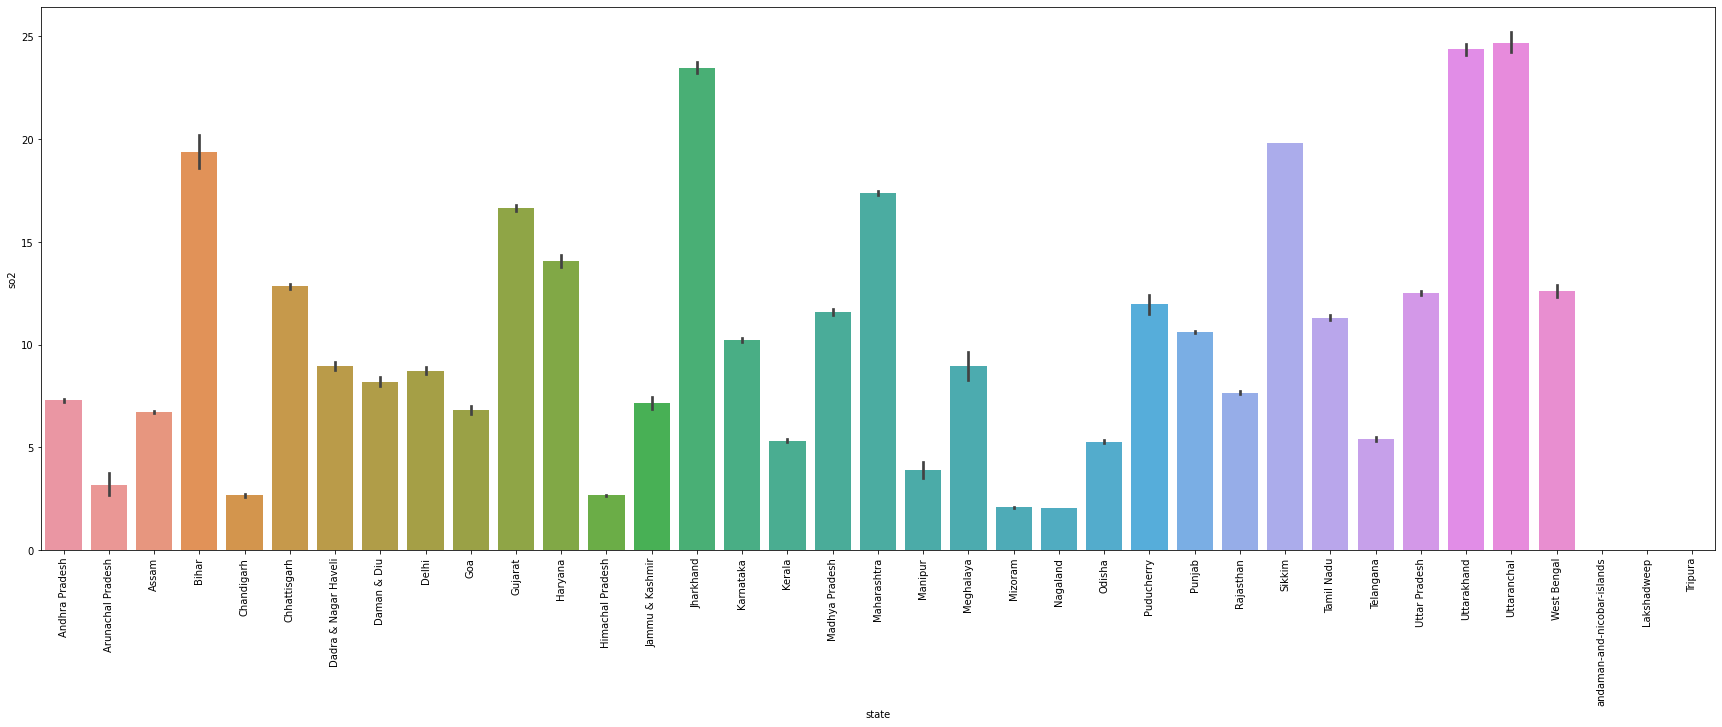

In [ ]:
#SO2 levels of state int the air
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

In [ ]:
plt.rcParams['figure.figsize']=(30,10)

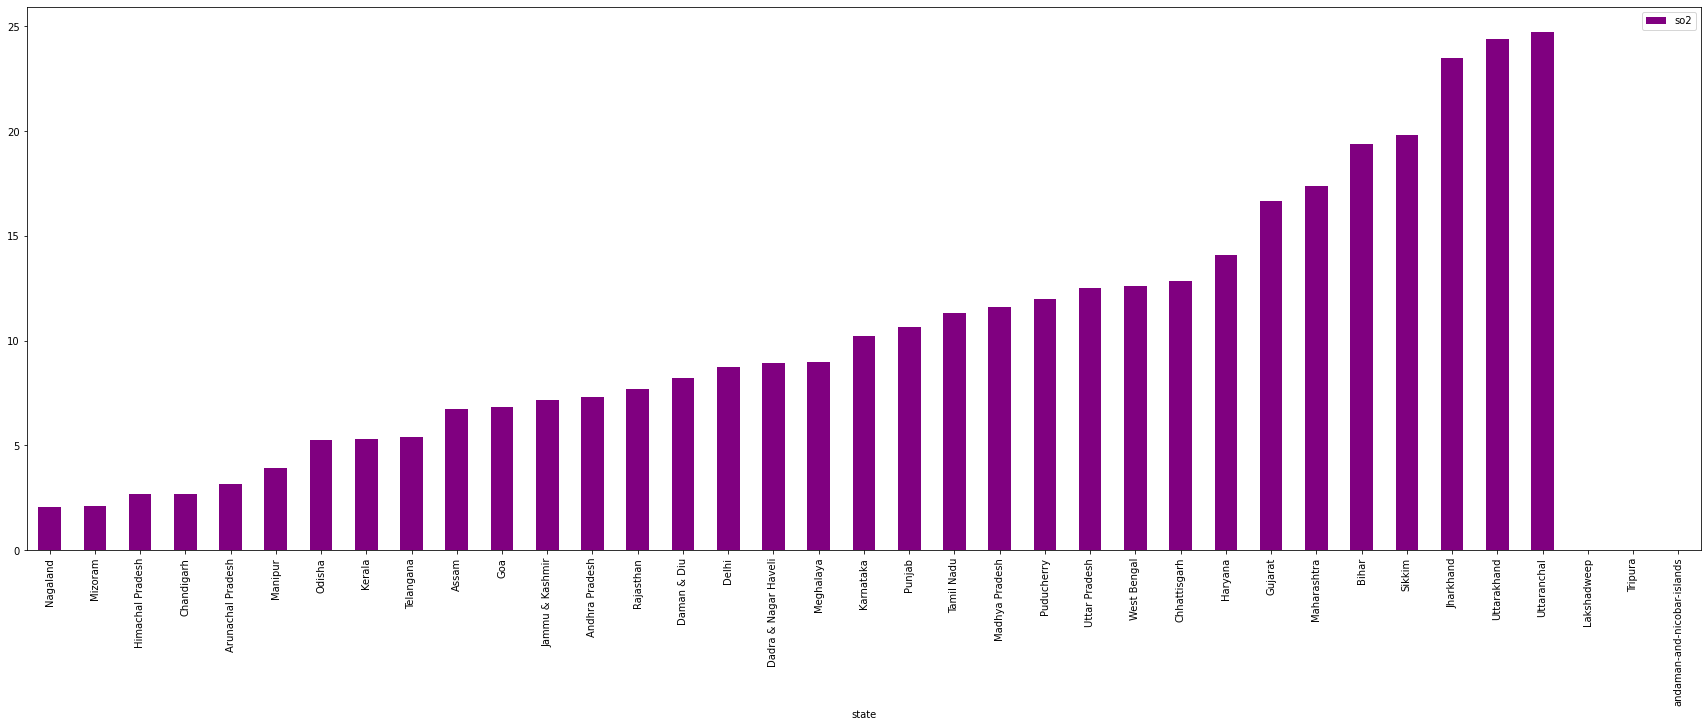

In [ ]:
#increasing order based on their SO2 levels
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='purple')

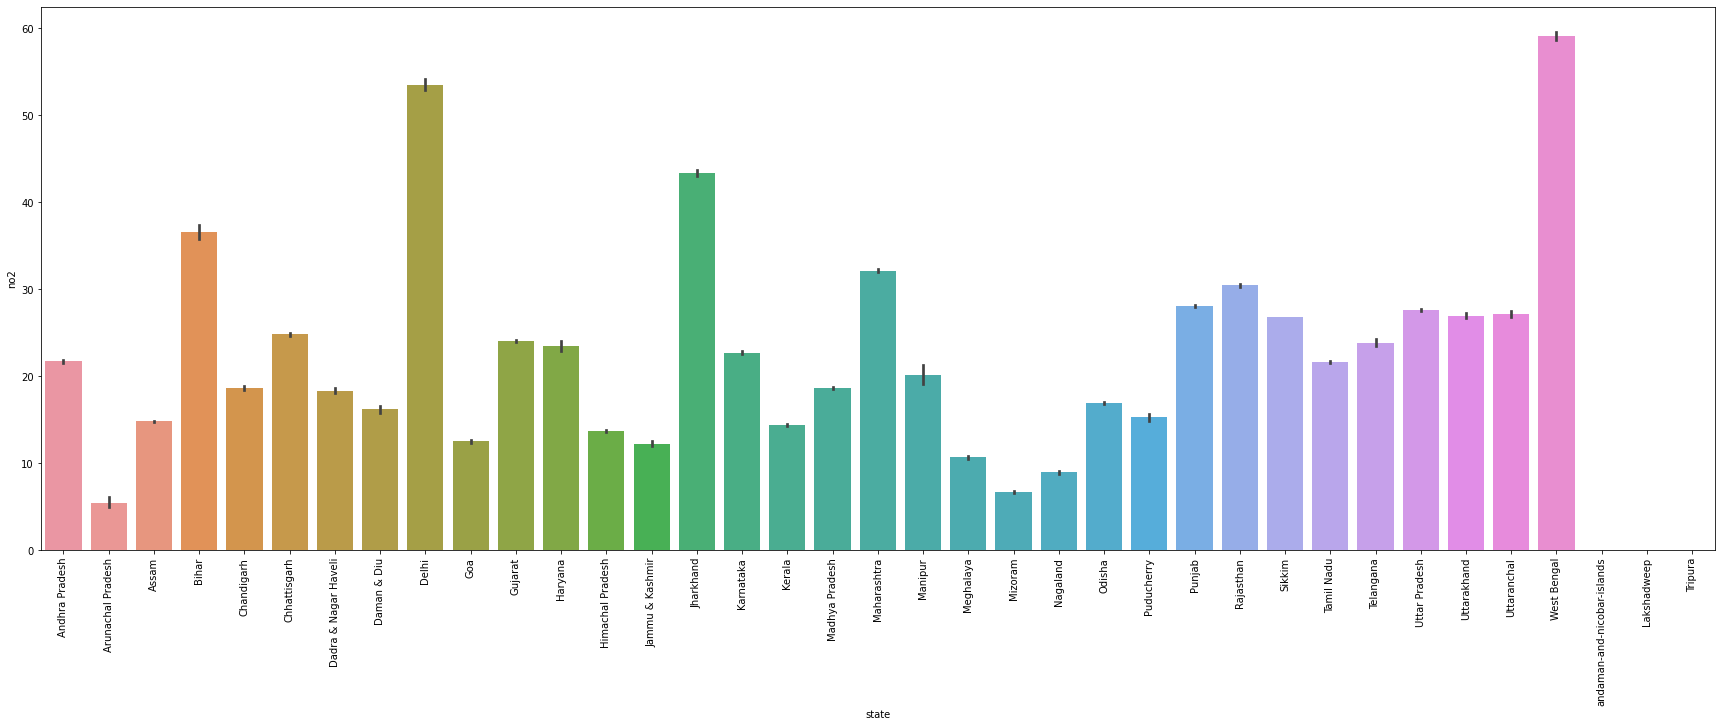

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);

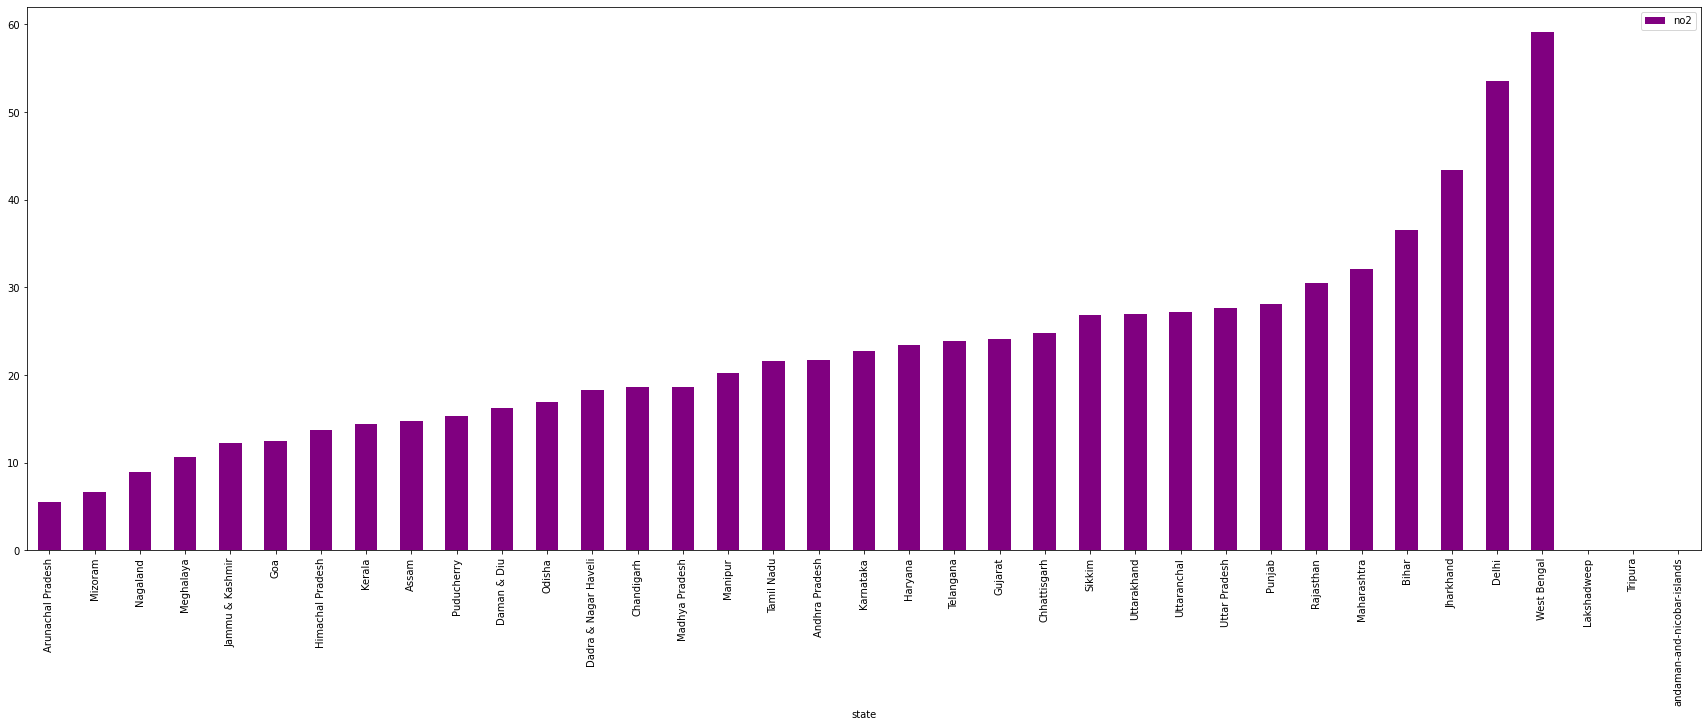

In [ ]:
df[['no2','state']].groupby(['state']).mean().sort_values(by='no2').plot.bar(color='purple')

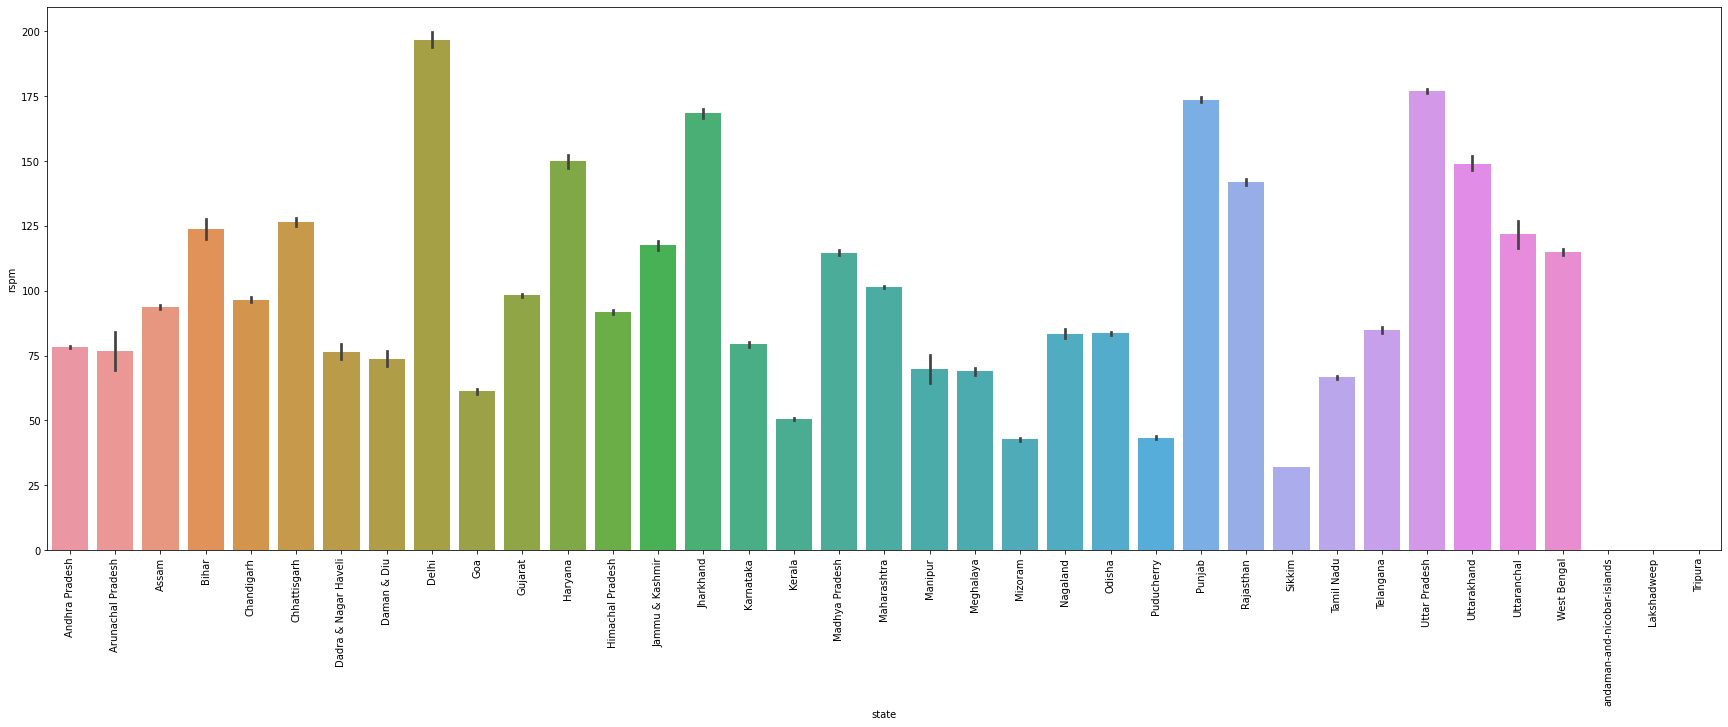

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);

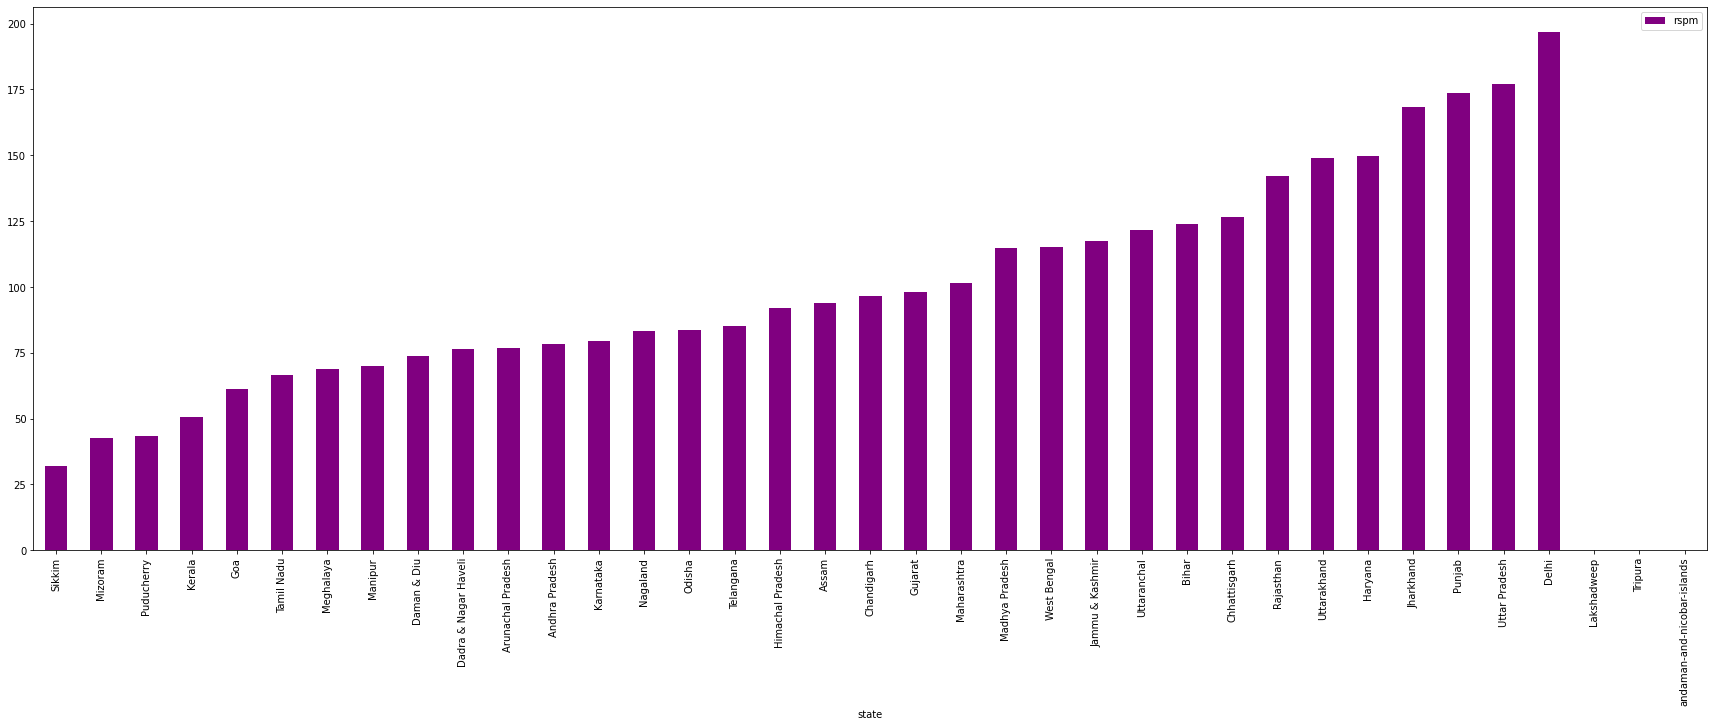

In [ ]:
df[['rspm','state']].groupby(['state']).mean().sort_values(by='rspm').plot.bar(color='purple')

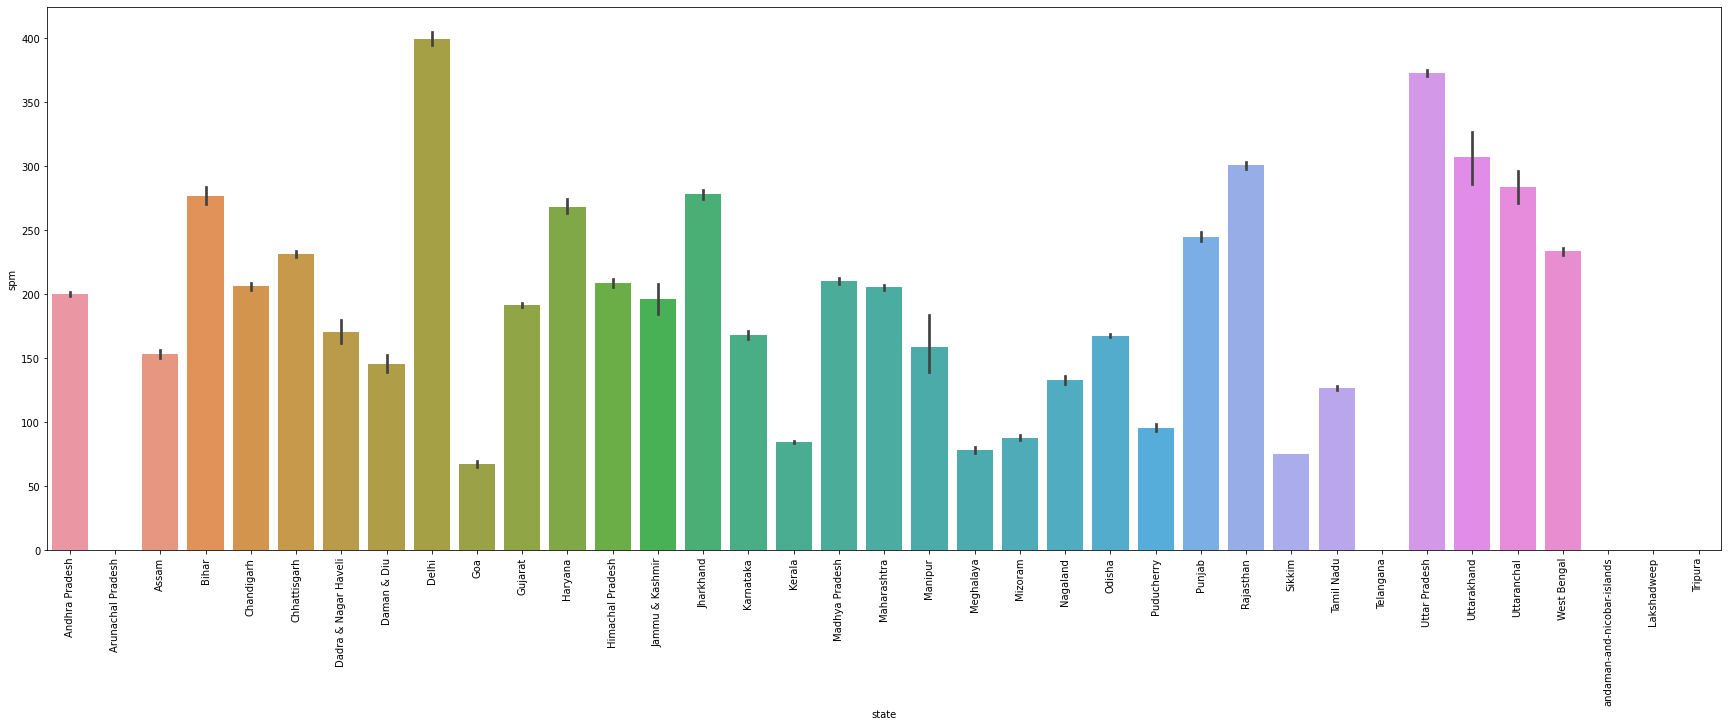

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);

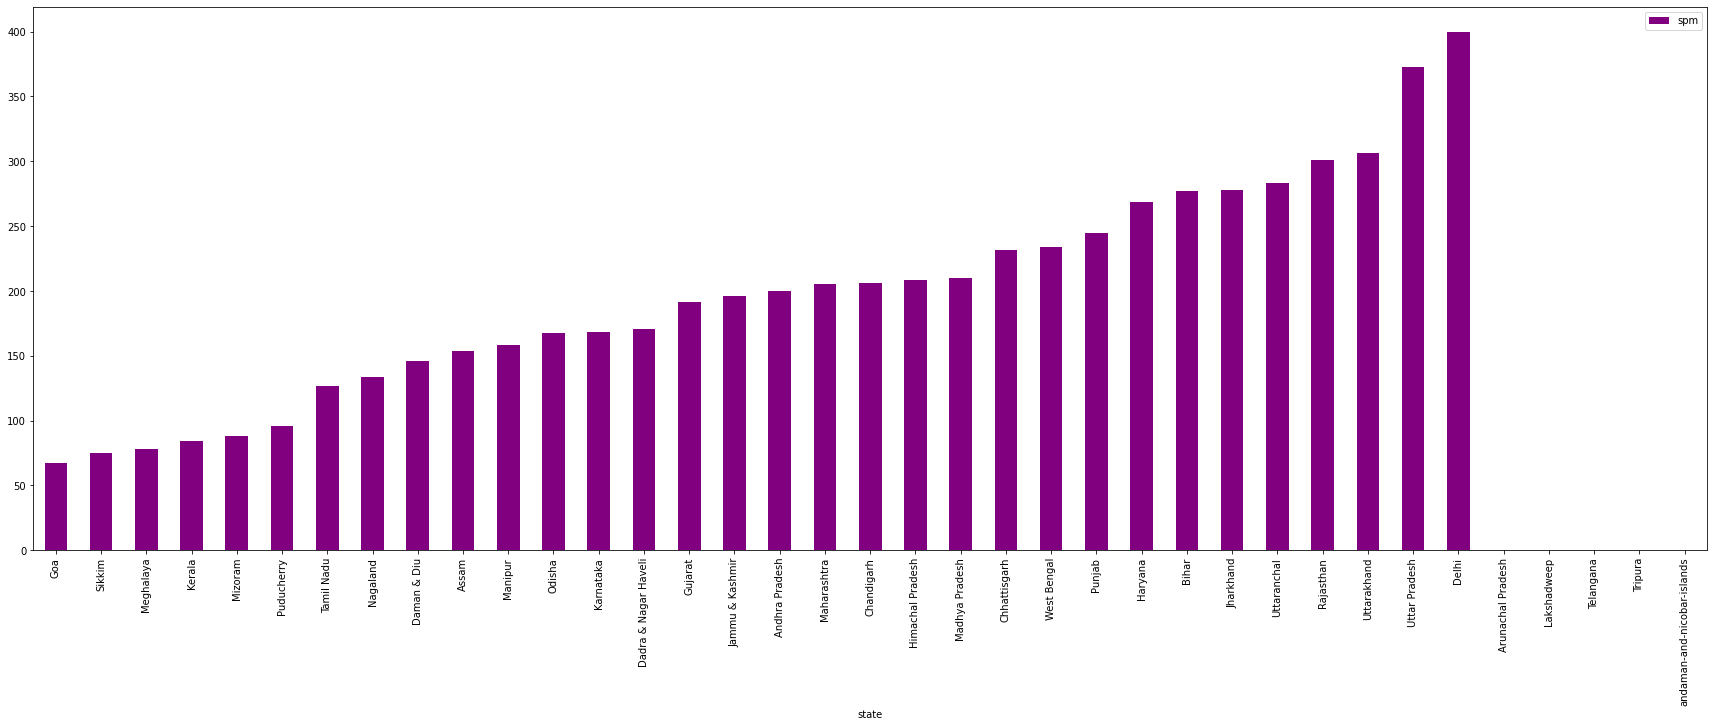

In [ ]:
df[['spm','state']].groupby(['state']).mean().sort_values(by='spm').plot.bar(color='purple')

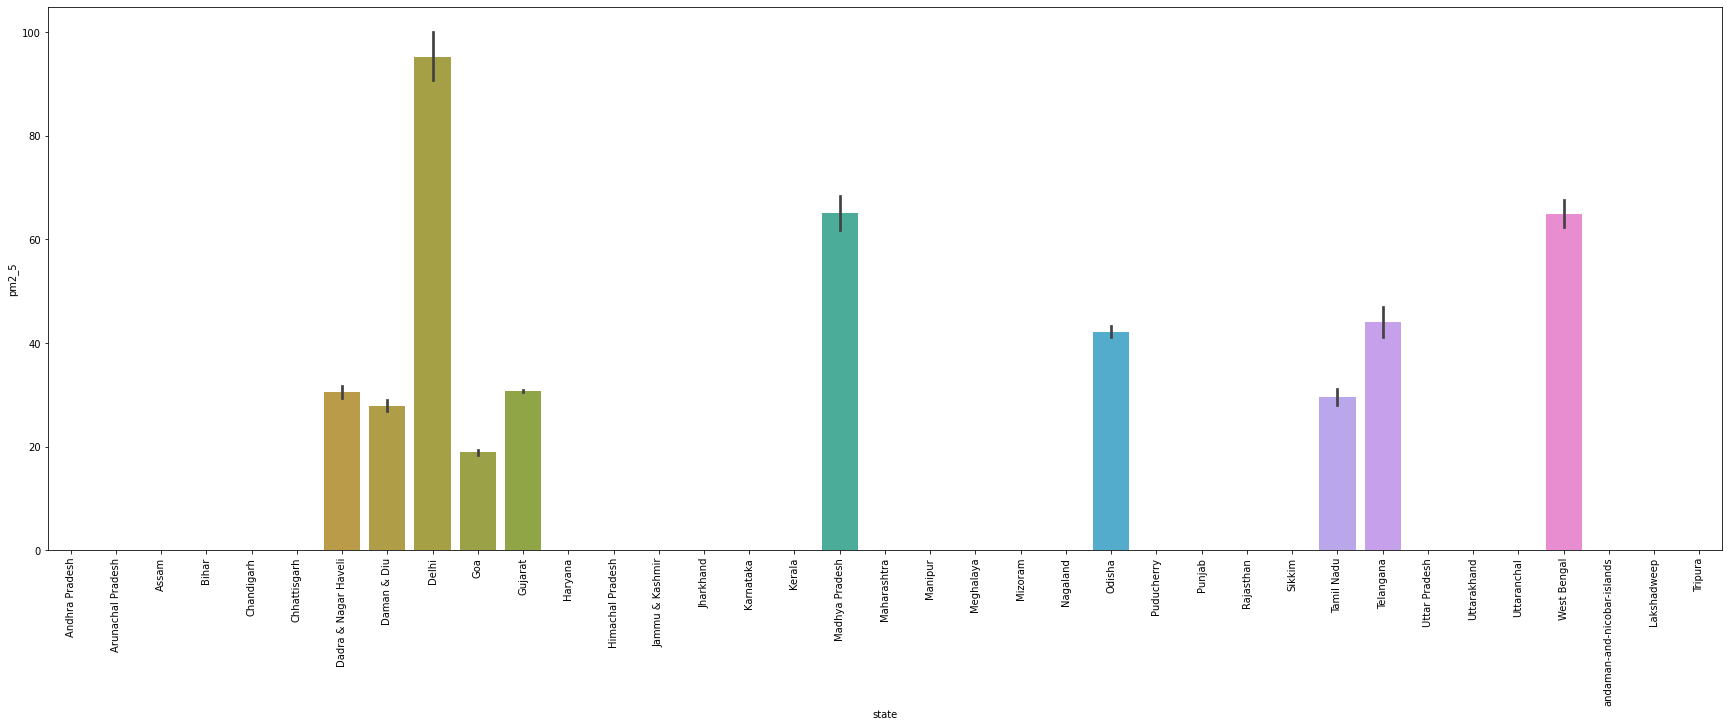

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

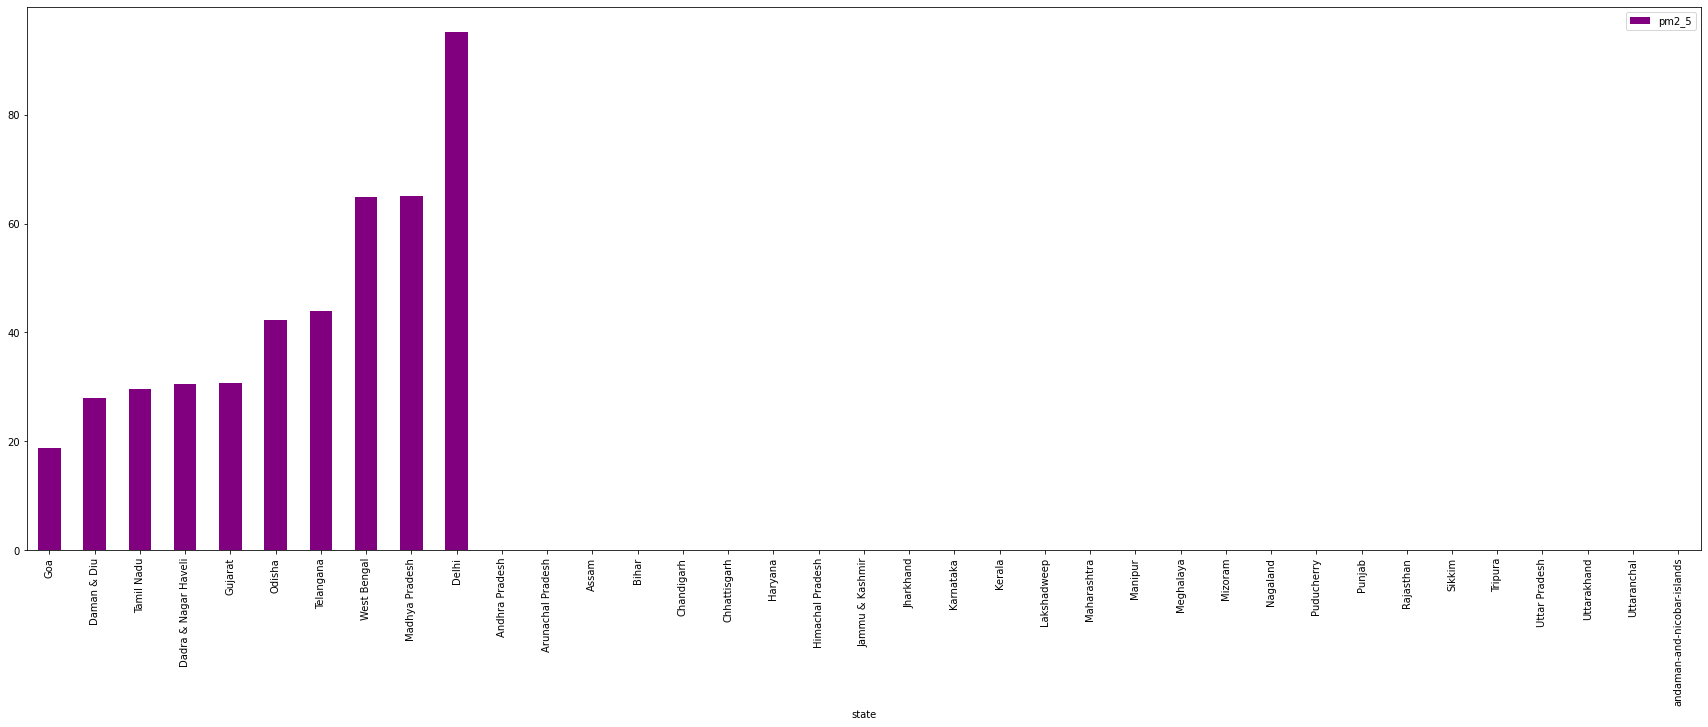

In [ ]:
df[['pm2_5','state']].groupby(['state']).mean().sort_values(by='pm2_5').plot.bar(color='purple')

#Checking all null values and treating those null values

In [ ]:
nullvalues=df.isnull().sum().sort_values(ascending=False)


In [ ]:
#higher null values present in pm2_5 followed by spm
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [ ]:
#count(returns Non-NAN value)
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [ ]:
#concatenating total null values and their percentage of missingvalues for further imputation or column deletion
missing_data_with_percentage=pd.concat([null_values_percentage],axis=1,keys=['Total','Percent'])

In [ ]:
missing_data_with_percentage

,Total
pm2_5,97.862497
spm,54.478797
agency,34.304933
stn_code,33.064749
rspm,9.230692
so2,7.951035
location_monitoring_station,6.309009
no2,3.725370
type,1.237659
date,0.001606


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
#dropping unnecessary columns
'''df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)'''

"df.drop(['agency'],axis=1,inplace=True)\ndf.drop(['stn_code'],axis=1,inplace=True)\ndf.drop(['date'],axis=1,inplace=True)\ndf.drop(['sampling_date'],axis=1,inplace=True)\ndf.drop(['location_monitoring_station'],axis=1,inplace=True)"

In [ ]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [ ]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Null value imputation for categorical data
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [ ]:
#null values are replaced with zeroes for the numerical data
df.fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

In [ ]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,0.0,"Inside Rampal Industries,ULUBERIA",0.0,2015-12-29
435739,0,0,andaman-and-nicobar-islands,Guwahati,0,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0,0.0,0
435740,0,0,Lakshadweep,Guwahati,0,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0,0.0,0


#Calculate AQI based on formula

The AQi is a piecewise linear function of the pollutant concentration. At the boundary between AQi categories, there is a discontinuous jump of one AQi unit. To convert from concentration to AQi this equation is used:

**Function to calculate SO2 individual pollutant index(si)**
Ip = [IHi – ILo / BPHi – BPLo] (Cp – BPLo) + ILo

*  Ip = index of pollutant p
*  Cp = truncated concentration of pollutant p
* BPHi = concentration breakpoint i.e. greater than or equal to Cp
* BPLo = concentration breakpoint i.e. less than or equal to Cp
* IHi = AQI value corresponding to BPHi
* ILo = AQI value corresponding to BPLo














In [ ]:
def cal_SOi(so2):
  si=0
  if(so2<=40):
    si=so2*(50/40)
  elif(so2>40 and so2<=80):
    si=50+(so2-40)*(50/40)
  elif(so2>80 and so2<=380):
    si=100+(so2-80)*(100/300)
  elif(so2>380 and so2<=800):
    si=200+(so2-380)*(100/420)
  elif(so2>800 and so2<=1600):
    si=300+(so2-800)*(100/800)
  elif(so2>1600):
    si=400+(so2-1600)*(100/800)
  return si
df['SOi']=df['so2'].apply(cal_SOi)
data=df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


Function to calculate no2 individual pollutant index(ni)

In [ ]:
def cal_NOi(no2):
  si=0
  if(no2<=40):
    ni=no2*(50/40)
  elif(no2>40 and no2<=80):
    ni=50+(no2-40)*(50/40)
  elif(no2>80 and no2<=180):
    ni=100+(no2-80)*(100/100)
  elif(no2>180 and no2<=280):
    ni=200+(no2-180)*(100/100)
  elif(no2>280 and no2<=400):
    ni=300+(no2-280)*(100/120)
  else:
    ni=400+(no2-400)*(100/120)
  return ni
df['NOi']=df['no2'].apply(cal_NOi)
data=df[['no2','NOi']]
data.head()

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


Function to calculate rspm individual pollutant index(rpi)

In [ ]:
def cal_RSPMI(rspm):
  rpi=0
  if(rpi<=30):
    rpi=rpi*(50/30)
  elif(rpi>30 and rpi<=60):
    rpi=50+(rpi-30)*(50/30)
  elif(rpi>60 and rpi<=90):
    rpi=100+(rpi-60)*(100/30)
  elif(rpi>90 and rpi<=120):
    rpi=200+(rpi-90)*(100/30)
  elif(rpi>120 and rpi<=250):
    rpi=300+(rpi-120)*(100/130)
  else:
    rpi=400+(rpi-250)*(100/130)
  return rpi
df['Rpi']=df['rspm'].apply(cal_SOi)
data=df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Function to calculate spm individual pollutant index(spi)

In [ ]:
def cal_SPMi(spm):
  spi=0
  if(spm<=50):
    spi=spi*(50/50)
  elif(spm>50 and spm<=100):
    spi=50+(spm-50)*(50/50)
  elif(spm>100 and spm<=250):
    spi=100+(spm-100)*(100/150)
  elif(spm>250 and spm<=350):
    spi=200+(spm-250)*(100/100)
  elif(spm>350 and spm<=430):
    spi=300+(spm-350)*(100/80)
  else:
    spi=400+(spm-430)*(100/430)
  return spi
df['SPMi']=df['spm'].apply(cal_SPMi)
data=df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


**Function to calculate the AQI of every data value**


In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
  aqi=0
  if(si>ni and si>rspmi and si>spmi):
    aqi=si
  if(ni>si and ni>rspmi and ni>spmi):
    aqi=ni
  if(rspmi>si and rspmi>ni and rspmi>spmi):
    aqi=rspmi
  if(spmi>si and spmi>ni and spmi>rspmi):
    aqi=spmi
  return aqi
df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['NOi'],x['Rpi'],x['SPMi']),axis=1)
data=df[['state','SOi','NOi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,NOi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


Air category based on the AQI score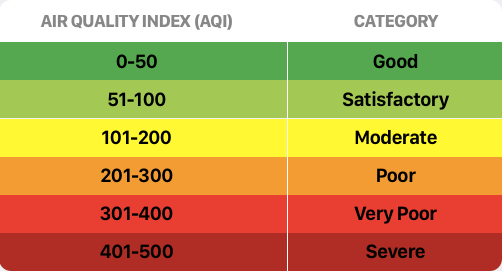

In [ ]:
def AQI_Range(x):
  if x<=50:
    return "Good"
  elif x>50 and x<=100:
    return "Satisfactory"
  elif x>100 and x<=200:
    return "Moderate"
  elif x>200 and x<=300:
    return "Poor"
  elif x>300 and x<=400:
    return "Severe"
  elif x>400:
    return "Hazadrdous"
df['AQI_Range']=df['AQI'].apply(AQI_Range)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01,6.000,21.750,0.0,0.0,21.750,Good
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01,3.875,8.750,0.0,0.0,8.750,Good
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01,7.750,35.625,0.0,0.0,35.625,Good
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01,7.875,18.375,0.0,0.0,18.375,Good
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01,5.875,9.375,0.0,0.0,9.375,Good


In [ ]:
#counts of values present in AQI_Range column
df['AQI_Range'].value_counts()

Moderate        222235
Satisfactory    102871
Good             42576
Poor             33510
Hazadrdous       18701
Severe           15849
Name: AQI_Range, dtype: int64

#Splitting the dataset into Dependent and Independent columns

In [ ]:
X=df[['SOi','NOi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,NOi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [ ]:
Y.head()
#the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [ ]:
#Splitting data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


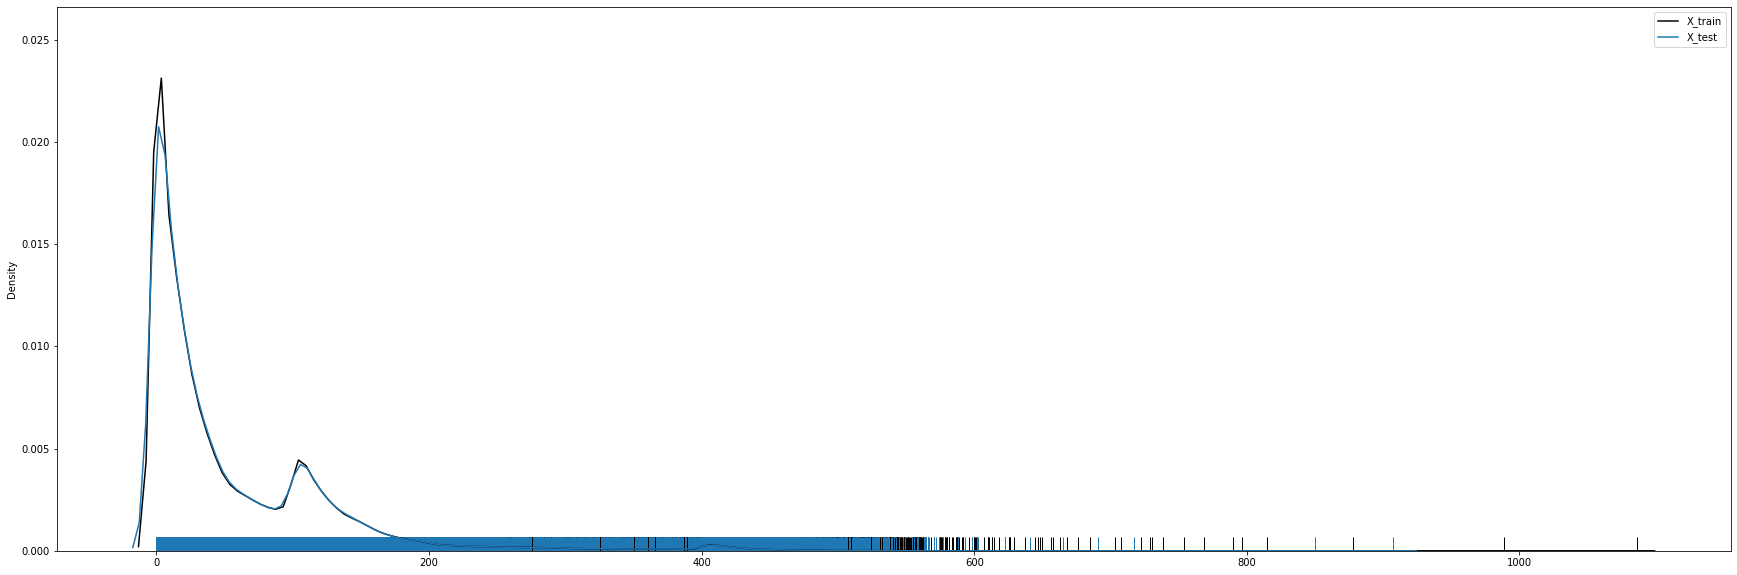

In [ ]:
sns.distplot(X_train,color="black",hist=False,rug=True,bins=100)
sns.distplot(X_test,hist=False,rug=True,bins=100)
plt.legend(labels=["X_train","X_test"])

#Linear Regression

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train,Y_train))
print('RSquared value on test:',model.score(X_test,Y_test))

RMSE TrainingData= 27.489106647523798
RMSE TestData= 27.50778579243599
--------------------------------------------------
RSquared value on train: 0.9131622797834709
RSquared value on test: 0.9129088321711512


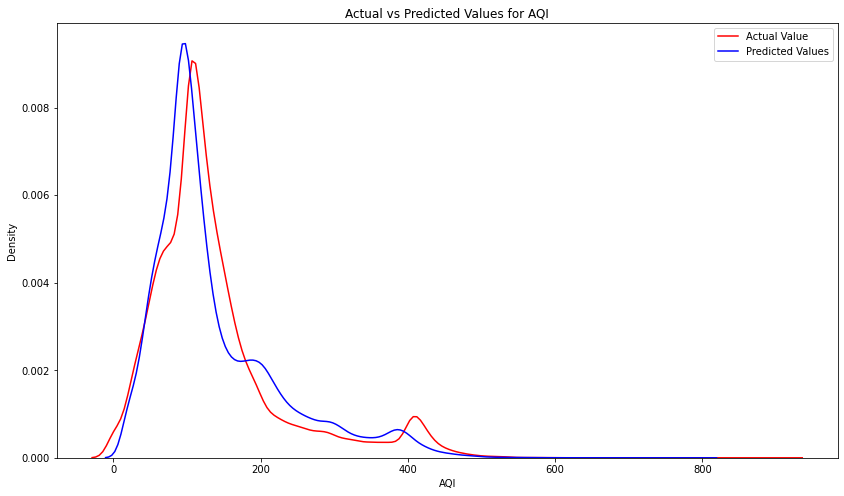

In [ ]:
plt.figure(figsize=(14,8))
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual Value")
sns.distplot(test_pred,hist=False,color="b",label="Predicted Values",ax=ax)

plt.title('Actual vs Predicted Values for AQI')

plt.legend()
plt.show()
plt.close()

#Decision Tree Regressor

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train,Y_train))
print('RSquared value on test:',DT.score(X_test,Y_test))

RMSE TrainingData= 4.3862280930412597e-13
RMSE TestData= 1.9949429260430251
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9995419384932747


#Random Forest Regressor


In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train,Y_train))
print('RSquared value on test:',DT.score(X_test,Y_test))

RMSE TrainingData= 0.864485450559793
RMSE TestData= 1.6487011656662192
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9995419384932747


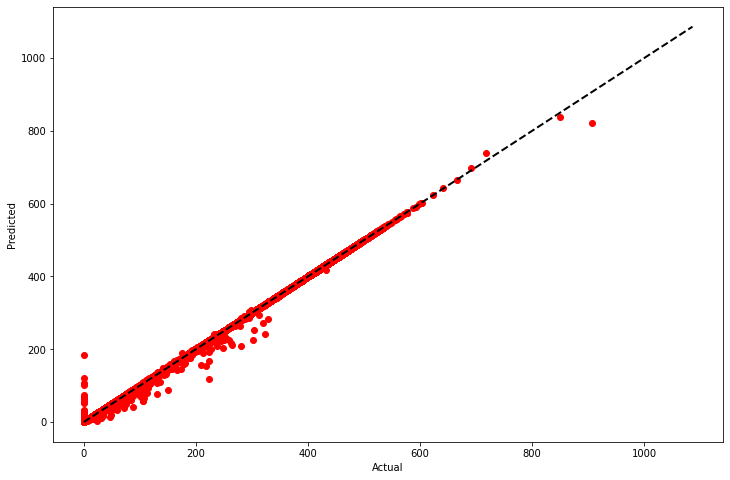

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(Y_test,test_preds1,cmap="civids",color="red")
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()

#Classification Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Splitting the data into independent columns for classification
X2=df[['SOi','NOi','Rpi','SPMi']]
Y2=df['AQI_Range']

In [ ]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.33,random_state=70)
print(X_train2.shape,X_test2.shape,Y_train2.shape,Y_test2.shape)

(291947, 4) (143795, 4) (291947,) (143795,)


#Logistic Regression


In [ ]:
#fit the model on train data
log_reg=LogisticRegression().fit(X_train2,Y_train2)

#predict on train
train_preds2=log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is:",accuracy_score(Y_train2,train_preds2))

#predict on test
test_preds2=log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is:",accuracy_score(Y_test2,test_preds2))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is: 0.6254114616694126
Model accuracy on test is: 0.6282346395910845
--------------------------------------------------
KappaScore is: 0.38861555079720644


In [ ]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Satisfactory'], dtype=object)

In [ ]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Satisfactory'], dtype=object)

In [ ]:
log_reg.predict([[10,2.8,82,20]])

array(['Moderate'], dtype=object)

In [ ]:
log_reg.predict([[2,45.8,37,32]])

array(['Satisfactory'], dtype=object)

#Decision Tree Classifier

In [ ]:
#fit the model on train data
DT2=DecisionTreeClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds3=DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is:",accuracy_score(Y_train2,train_preds3))

#predict on test
test_preds3=DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is:",accuracy_score(Y_test2,test_preds3))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is: 1.0
Model accuracy on test is: 0.9994784241454849
--------------------------------------------------
KappaScore is: 0.9992148758074039


#Random Forest Classifier

In [ ]:
#fit model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4=RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is:",accuracy_score(Y_train2,train_preds4))

#predict on test
test_preds4=RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is:",accuracy_score(Y_test2,test_preds4))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is: 1.0
Model accuracy on test is: 0.9996036023505686
--------------------------------------------------
KappaScore is: 0.9994032352391735


#K-Nearest Neighbours

In [ ]:
KNN=KNeighborsClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds5=KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is:",accuracy_score(Y_train2,train_preds5))

#predict on test
test_preds5=KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is:",accuracy_score(Y_test2,test_preds5))
print('-'*50)

#Kappa Score
print('KappaScore is:',metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is: 0.9952491376859498
Model accuracy on test is: 0.9918077819117493
--------------------------------------------------
KappaScore is: 0.9876540399239294


In [ ]:
print(KNN.predict([[7.4,47.7,78.182,100]]))

['Moderate']


In [ ]:
print(KNN.predict([[1,1.2,3.12,0]]))

['Good']


In [ ]:
print(KNN.predict([[325.7,345,798.182,203]]))

['Poor']


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [ ]:
print("Accuracy Score:",accuracy_score(Y_test2,test_preds5))

Accuracy Score: 0.9918077819117493


In [ ]:
from sklearn.metrics import classification_report
print("\t\tClassification Report\n")
cr=classification_report(Y_test2,test_preds5)
print(cr)
print("Accuracy Score:",accuracy_score(Y_test2,test_preds5))

		Classification Report

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     13972
  Hazadrdous       0.98      1.00      0.99      6088
    Moderate       0.99      1.00      0.99     73514
        Poor       0.99      0.98      0.99     10952
Satisfactory       0.99      0.99      0.99     34012
      Severe       0.99      0.97      0.98      5257

    accuracy                           0.99    143795
   macro avg       0.99      0.99      0.99    143795
weighted avg       0.99      0.99      0.99    143795

Accuracy Score: 0.9918077819117493
